In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import pyspark
from pyspark.sql import SparkSession
from pyspark.mllib.stat import Statistics

In [2]:
# import data
train_data = pd.read_csv('./input/train.csv', delimiter=',')
test_data = pd.read_csv('./input/test.csv', delimiter=',')

In [3]:
spark = SparkSession \
    .builder \
    .appName("BigDataAnalyzer") \
    .getOrCreate()

In [4]:
# wrap pandas df to spark df
temp_df = train_data.drop('sample_id', axis=1, inplace=False)
spark_df = spark.createDataFrame(temp_df)

In [5]:
# compute pearson corr matrix
df_rdd = spark_df.rdd.map(lambda row: row[:])
spark_corr = Statistics.corr(df_rdd, method='pearson')

In [6]:
# wrap to pandas df
pandas_cor = pd.DataFrame(spark_corr,
                columns=spark_df.columns, 
                index=spark_df.columns)

In [7]:
# stop spark
spark.stop()

In [17]:
# find N the most important features
def select_features(df, n):
    return df.nlargest(n, 'y').index

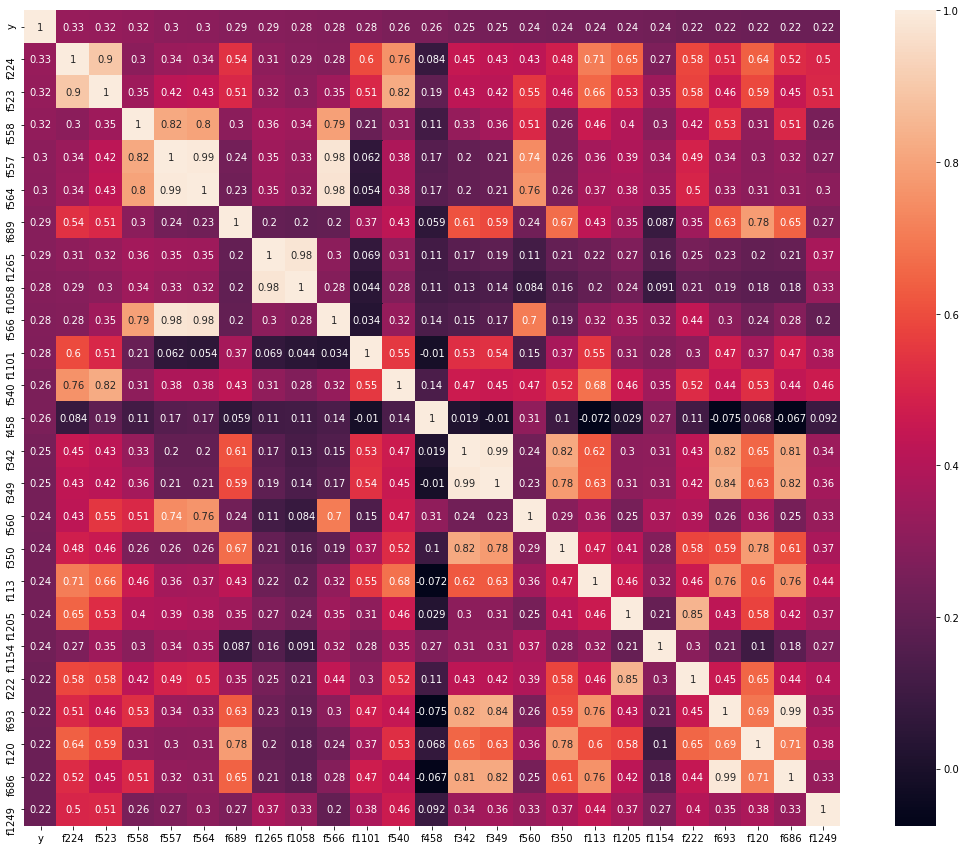

In [64]:
# draw correlation map
columns = select_features(pandas_cor, 25)
plt.figure(figsize=(20, 15))
sns.heatmap(train_data[columns].corr(), square=True, annot=True);

<Figure size 864x648 with 0 Axes>

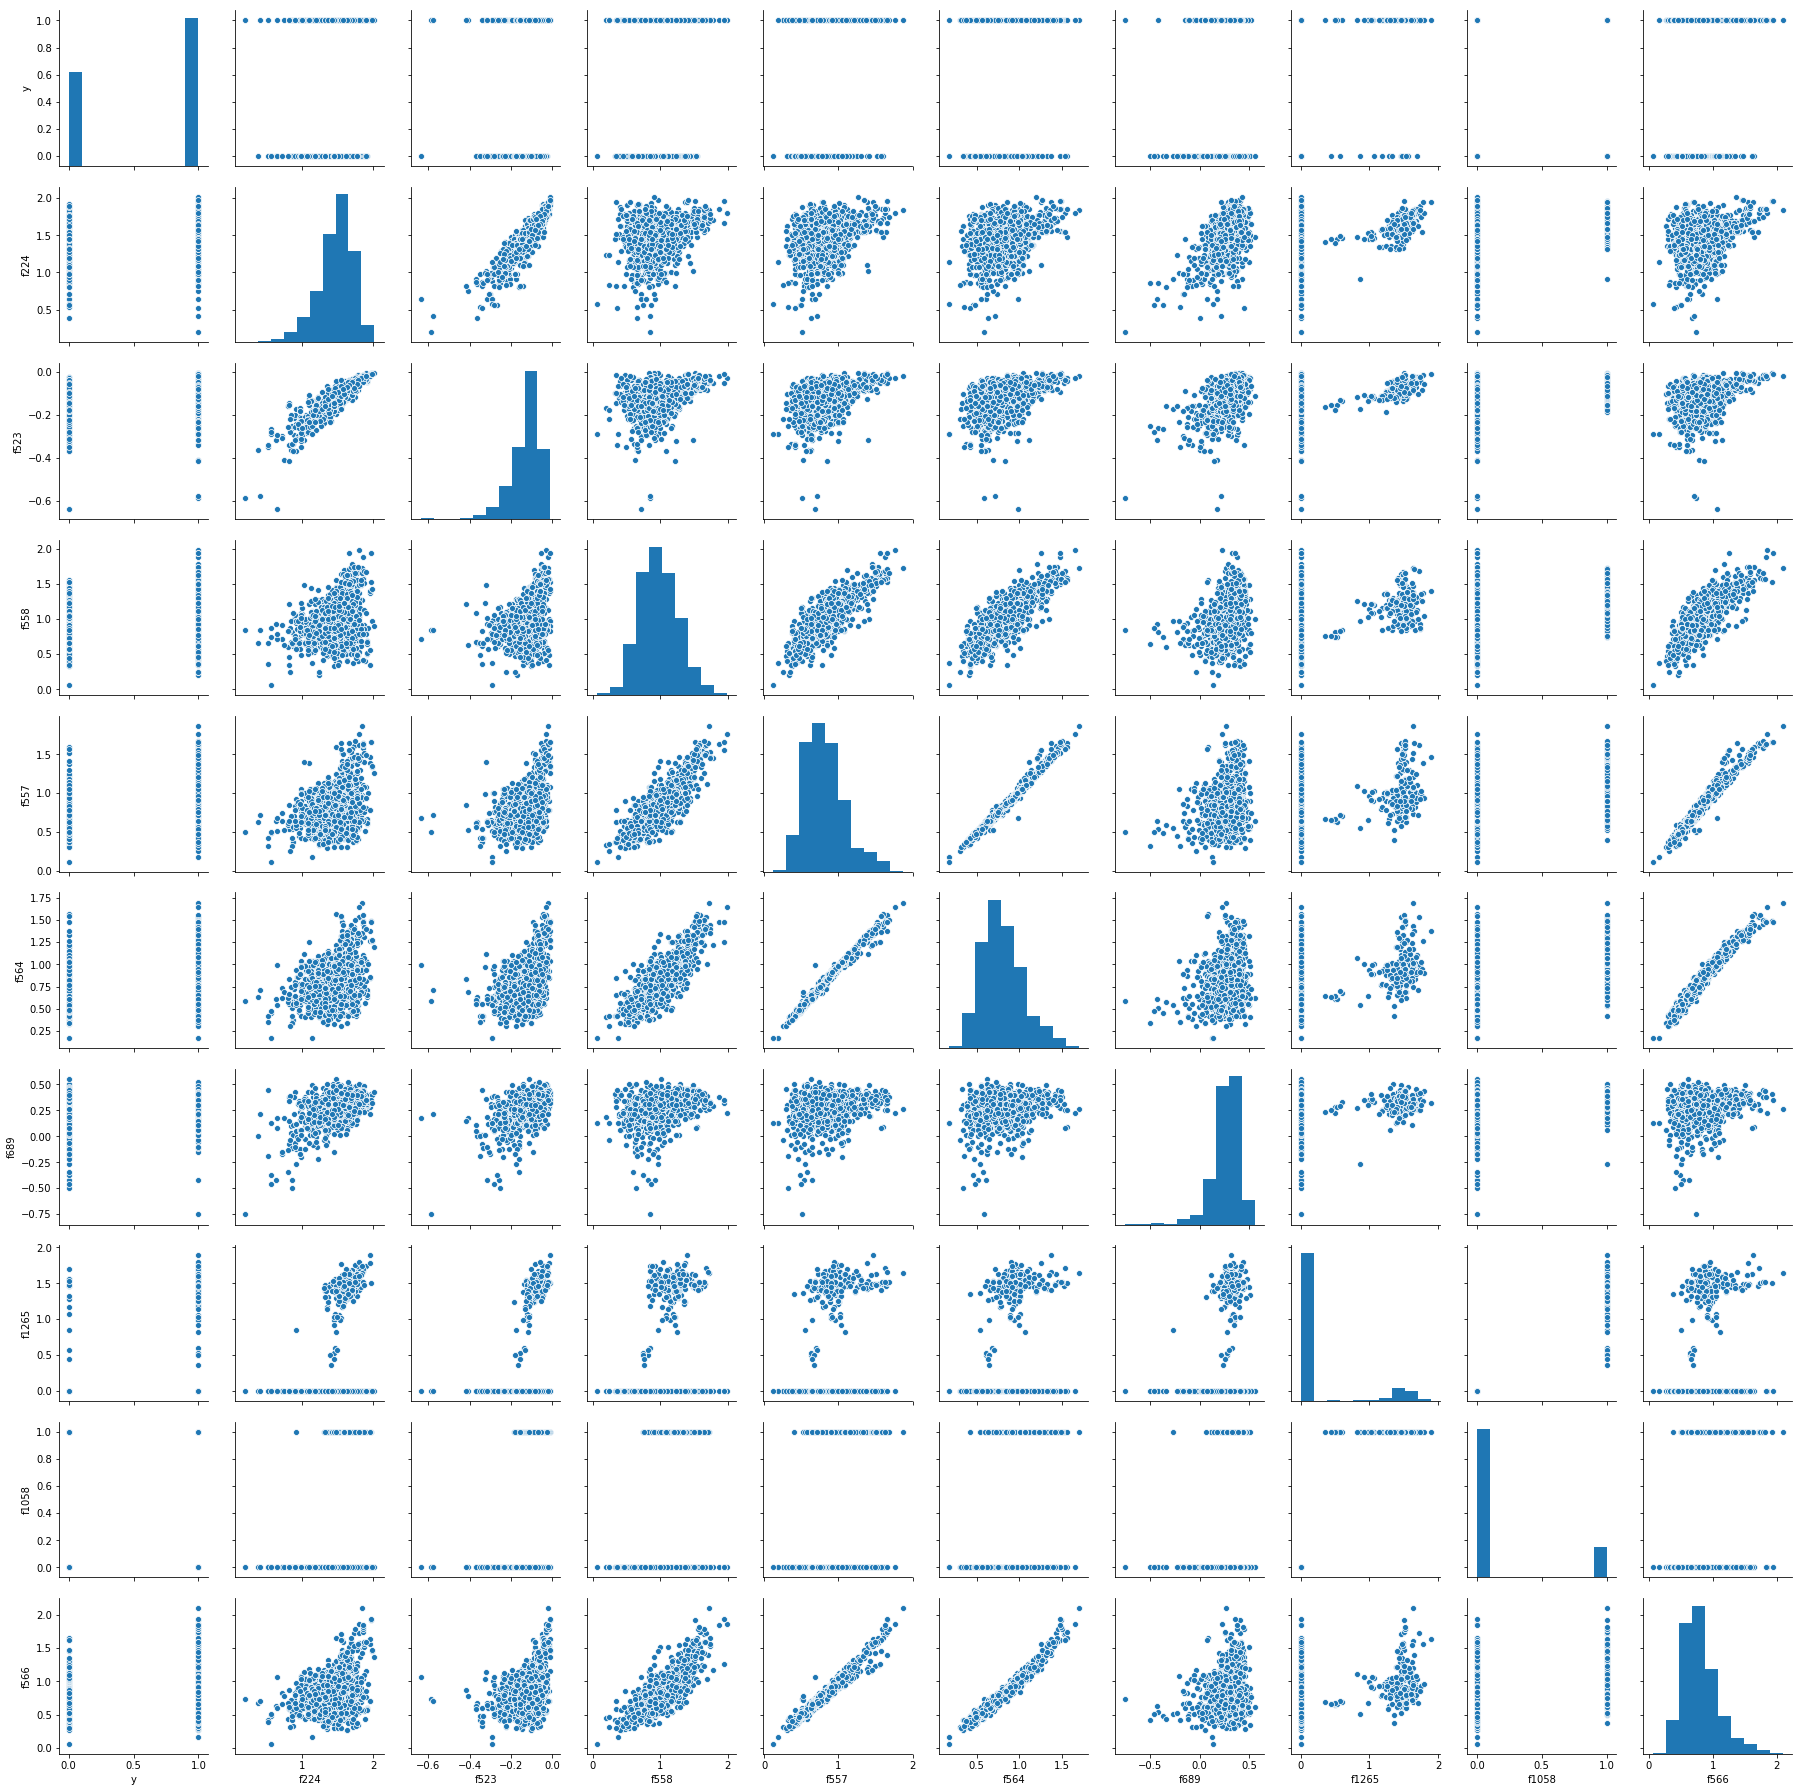

In [24]:
columns = select_features(pandas_cor, 10)
plt.figure(figsize=(12, 9))
sns.pairplot(train_data[columns]);

In [59]:
from scipy import stats
from scipy.stats import norm, skew

def plot(df):
    sns.distplot(df, fit=norm)
    (mu, sigma) = norm.fit(df)

    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    fig = plt.figure()
    #stats.probplot(df, plot=plt);

In [60]:
def check_dist(df, f_name):
    true_data = df[f_name][(df['y'] == 1) & (df['f224'].notnull())]
    false_data = df[f_name][(df['y'] == 0) & (df['f224'].notnull())]
    plot(true_data)
    plot(false_data)

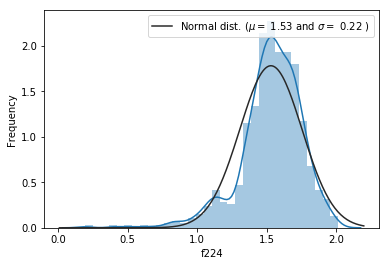

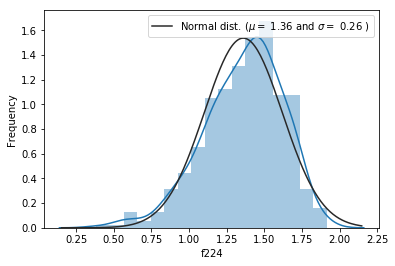

<Figure size 432x288 with 0 Axes>

In [61]:
check_dist(train_data, 'f224')

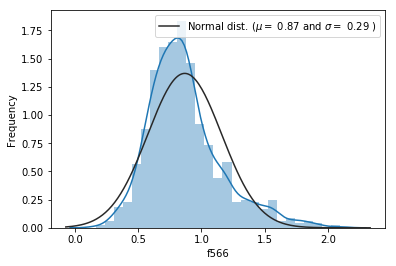

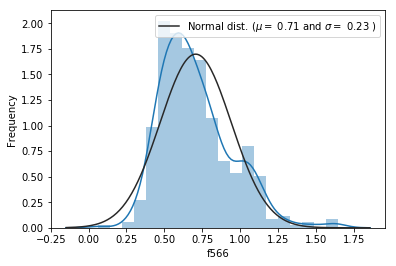

<Figure size 432x288 with 0 Axes>

In [62]:
check_dist(train_data, 'f566')